## Importing libraries


In [3]:
!pip install matplotlib
!pip install pandas
!pip install seaborn
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas #data visualization
import seaborn as sns


### Data Preprocessing

### Training image preprocessing

In [4]:
#we use the keras library for preprocessing loding the image to neural networkk
training_set= tf.keras.utils.image_dataset_from_directory(
    "train", #where the data is located
    labels="inferred",#Saying to TensorFlow go inside my train and give the name as that directory
    label_mode="categorical", #i use 38 class so i used categorical
    class_names=None,
    color_mode="rgb",
    batch_size=32, #fast we can change that 64
    image_size=(128, 128),
    shuffle=True,#it will reduces the baias of model when we shuffel i will learn from every type
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


In [5]:
import os
print(os.listdir("train"))  # Should list all category folders


['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',

In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    "valid",  # This is correct because your notebook is already in the parent folder
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
)


Found 17572 files belonging to 38 classes.


In [7]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [8]:
for x,y in training_set: #to see the strecture of training set 
    print(x,x.shape)#it will say that at time we train 32 examples because i gave the batch name as the 32 so ondu sala adu 32 training example koduthe
    print(y,y.shape)
    break

tf.Tensor(
[[[[255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]]

  [[255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]]

  [[255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]]

  ...

  [[248.   234.5  248.  ]
   [241.25 230.   241.25]
   [253.25 246.25 253.  ]
   ...
   [233.75 225.25 234.75]
   [240.25 233.25 240.75]
   [246.   235.75 247.  ]]

  [[244.   230.5  244.25]
   [248.75 236.75 249.  ]
   [251.   243.25 250.25]
   ...
   [227.   217.5  228.  ]
   [243.5  232.25 243.5 ]
   [254.25 246.25 254.  ]]

  [[253.25 237.   253.75]
   [255.   241.5  255.  ]
   [251.5  243.5  251.25]
   ...
   [253.75 245.75 253.75]
   [235.5  225.25 235.5 ]
   [247.5  235.   24

## Cnn we use to detecting the disease

## To avoid Overshooting
1.Choose small learning rate default 0.0001 we are taking 0,0001
2.There may be a chance of under fitting so increase number of neuron
3.Add  more conv layer to extract more feature from images may be possible of that unable to capture relevent feature or model is confusing due to lack of feature so feed with more feature 

## Building  Model

In [9]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.models import Sequential

In [10]:
model = Sequential() #this is model

In [11]:
# building convolution layer 

In [12]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))  #add the first convolution layer filter are creating the feature map

C:\Users\varsh\.conda\anaconda\envs\tensorflow_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Dropout(0,25))#drop some of the neurons

In [17]:
#flattening operation
from tensorflow.keras.layers import Flatten
model.add(Flatten())

In [18]:
model.add(Dense(units=1500,activation='relu'))

In [19]:
model.add(Dropout(0.4))#avoid overfitting

In [20]:
#output layer
model.add(Dense(units=38,activation='softmax'))#softmax function is used for the  give the output inthe form of the accuracy

## Compiling Model

In [21]:
model.compile(optimizer= tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │      27,649,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,943,690 (118.04 MB)

 Trainable params: 30,943,690 (118.04 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [23]:
training_history = model.fit(x=training_set,validation_data = validation_set,epochs=5)

Epoch 1/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 7263s 3s/step - accuracy: 0.7114 - loss: 0.9877 - val_accuracy: 0.8846 - val_loss: 0.3589
Epoch 2/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 6839s 3s/step - accuracy: 0.9073 - loss: 0.2918 - val_accuracy: 0.9284 - val_loss: 0.2177
Epoch 3/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 7263s 3s/step - accuracy: 0.9466 - loss: 0.1665 - val_accuracy: 0.9303 - val_loss: 0.2187
Epoch 4/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 7358s 3s/step - accuracy: 0.9646 - loss: 0.1084 - val_accuracy: 0.9519 - val_loss: 0.1554
Epoch 5/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 7456s 3s/step - accuracy: 0.9740 - loss: 0.0794 - val_accuracy: 0.9280 - val_loss: 0.2301


## Model evaluation

In [24]:
#model Evaluation for training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2098s 955ms/step - accuracy: 0.9683 - loss: 0.0965


In [25]:
#print how much i have lossed and how much i have got accuracy
print(train_loss,train_acc)

0.0964934304356575 0.9683334231376648


In [26]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 408s 738ms/step - accuracy: 0.9280 - loss: 0.2301


In [27]:
print(val_loss,val_acc)

0.2300529032945633 0.9279535412788391


## Saving Model

In [50]:
#to save the model training because we can do again and again 
model.save("trained_model1.keras")#h5 or keras we can save the file for  compresed way we use the keras insted of h5

In [51]:
training_history.history

{'accuracy': [0.7114161849021912,
  0.9073476195335388,
  0.9466391801834106,
  0.9645636081695557,
  0.9740237593650818],
 'loss': [0.9876884818077087,
  0.29175519943237305,
  0.1664930284023285,
  0.10841110348701477,
  0.07939428091049194],
 'val_accuracy': [0.8846459984779358,
  0.9284088611602783,
  0.9302868247032166,
  0.9519121050834656,
  0.9279535412788391],
 'val_loss': [0.35892924666404724,
  0.21767131984233856,
  0.2186783403158188,
  0.15542413294315338,
  0.23005272448062897]}

In [52]:
#Recording the history in json 
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [53]:
training_history.history['val_accuracy']

[0.8846459984779358,
 0.9284088611602783,
 0.9302868247032166,
 0.9519121050834656,
 0.9279535412788391]

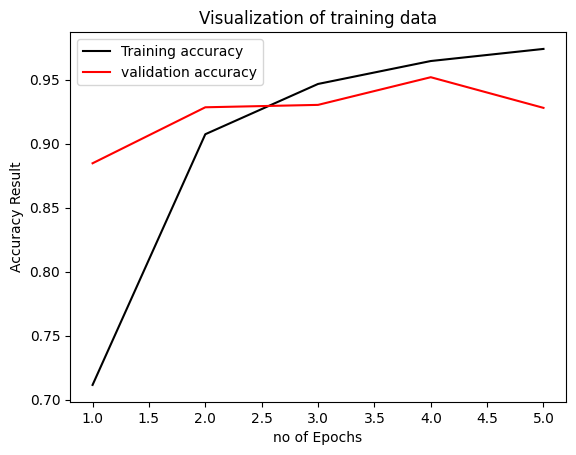

In [54]:
epochs =[i for i in range(1,6)]
plt.plot(epochs,training_history.history['accuracy'],color = 'black',label='Training accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color = 'red',label='validation accuracy')
plt.xlabel("no of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of training data")
plt.legend()
plt.show()

## Some other matrics for model evaluation

In [55]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [56]:
test_set = tf.keras.utils.image_dataset_from_directory(
    "valid",  # This is correct because your notebook is already in the parent folder
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,#it will take sequential fassion
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [57]:
y_pred = model.predict(test_set)
y_pred

550/550 ━━━━━━━━━━━━━━━━━━━━ 976s 2s/step


array([[9.9995911e-01, 2.4006018e-05, 9.8980317e-09, ..., 4.4588039e-10,
        3.4082419e-09, 1.4684671e-08],
       [9.9981958e-01, 1.3605988e-04, 2.3113728e-08, ..., 1.3286608e-10,
        1.7518140e-09, 4.1665420e-08],
       [9.9998963e-01, 1.5017984e-07, 1.1899424e-09, ..., 9.3412271e-14,
        1.2942093e-10, 4.8537263e-09],
       ...,
       [4.3664290e-08, 3.1772182e-11, 3.0218498e-08, ..., 3.8416506e-10,
        3.7139367e-10, 9.9999809e-01],
       [2.5772845e-06, 6.3069487e-11, 1.2796755e-08, ..., 9.3331509e-10,
        1.7008348e-10, 9.9999619e-01],
       [5.2253487e-13, 2.6118740e-15, 2.4011026e-13, ..., 9.3356211e-15,
        2.1814951e-11, 1.0000000e+00]], dtype=float32)

In [58]:
predicted_categories = tf.argmax(y_pred,axis=1)#argmax is used for the return the maximum value in axis 1 means in vertical way

In [59]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [60]:
#true categories
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories 

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [61]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

### calculate the presision recal


In [62]:
# it is used for thw check the model that is correctly predicted  by compare the first trained one and resulted one
!pip install scikit-learn
from sklearn.metrics import classification_report,confusion_matrix

In [63]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.80      0.97      0.88       504
                                 Apple___Black_rot       0.89      0.98      0.93       497
                          Apple___Cedar_apple_rust       0.97      0.92      0.94       440
                                   Apple___healthy       0.98      0.88      0.93       502
                               Blueberry___healthy       0.95      0.95      0.95       454
          Cherry_(including_sour)___Powdery_mildew       0.96      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.96      0.98      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.91      0.88      0.90       410
                       Corn_(maize)___Common_rust_       1.00      0.97      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.95      0.

In [64]:
cm =confusion_matrix (Y_true,predicted_categories)
cm.shape

(38, 38)

## visualization of confussion matrix


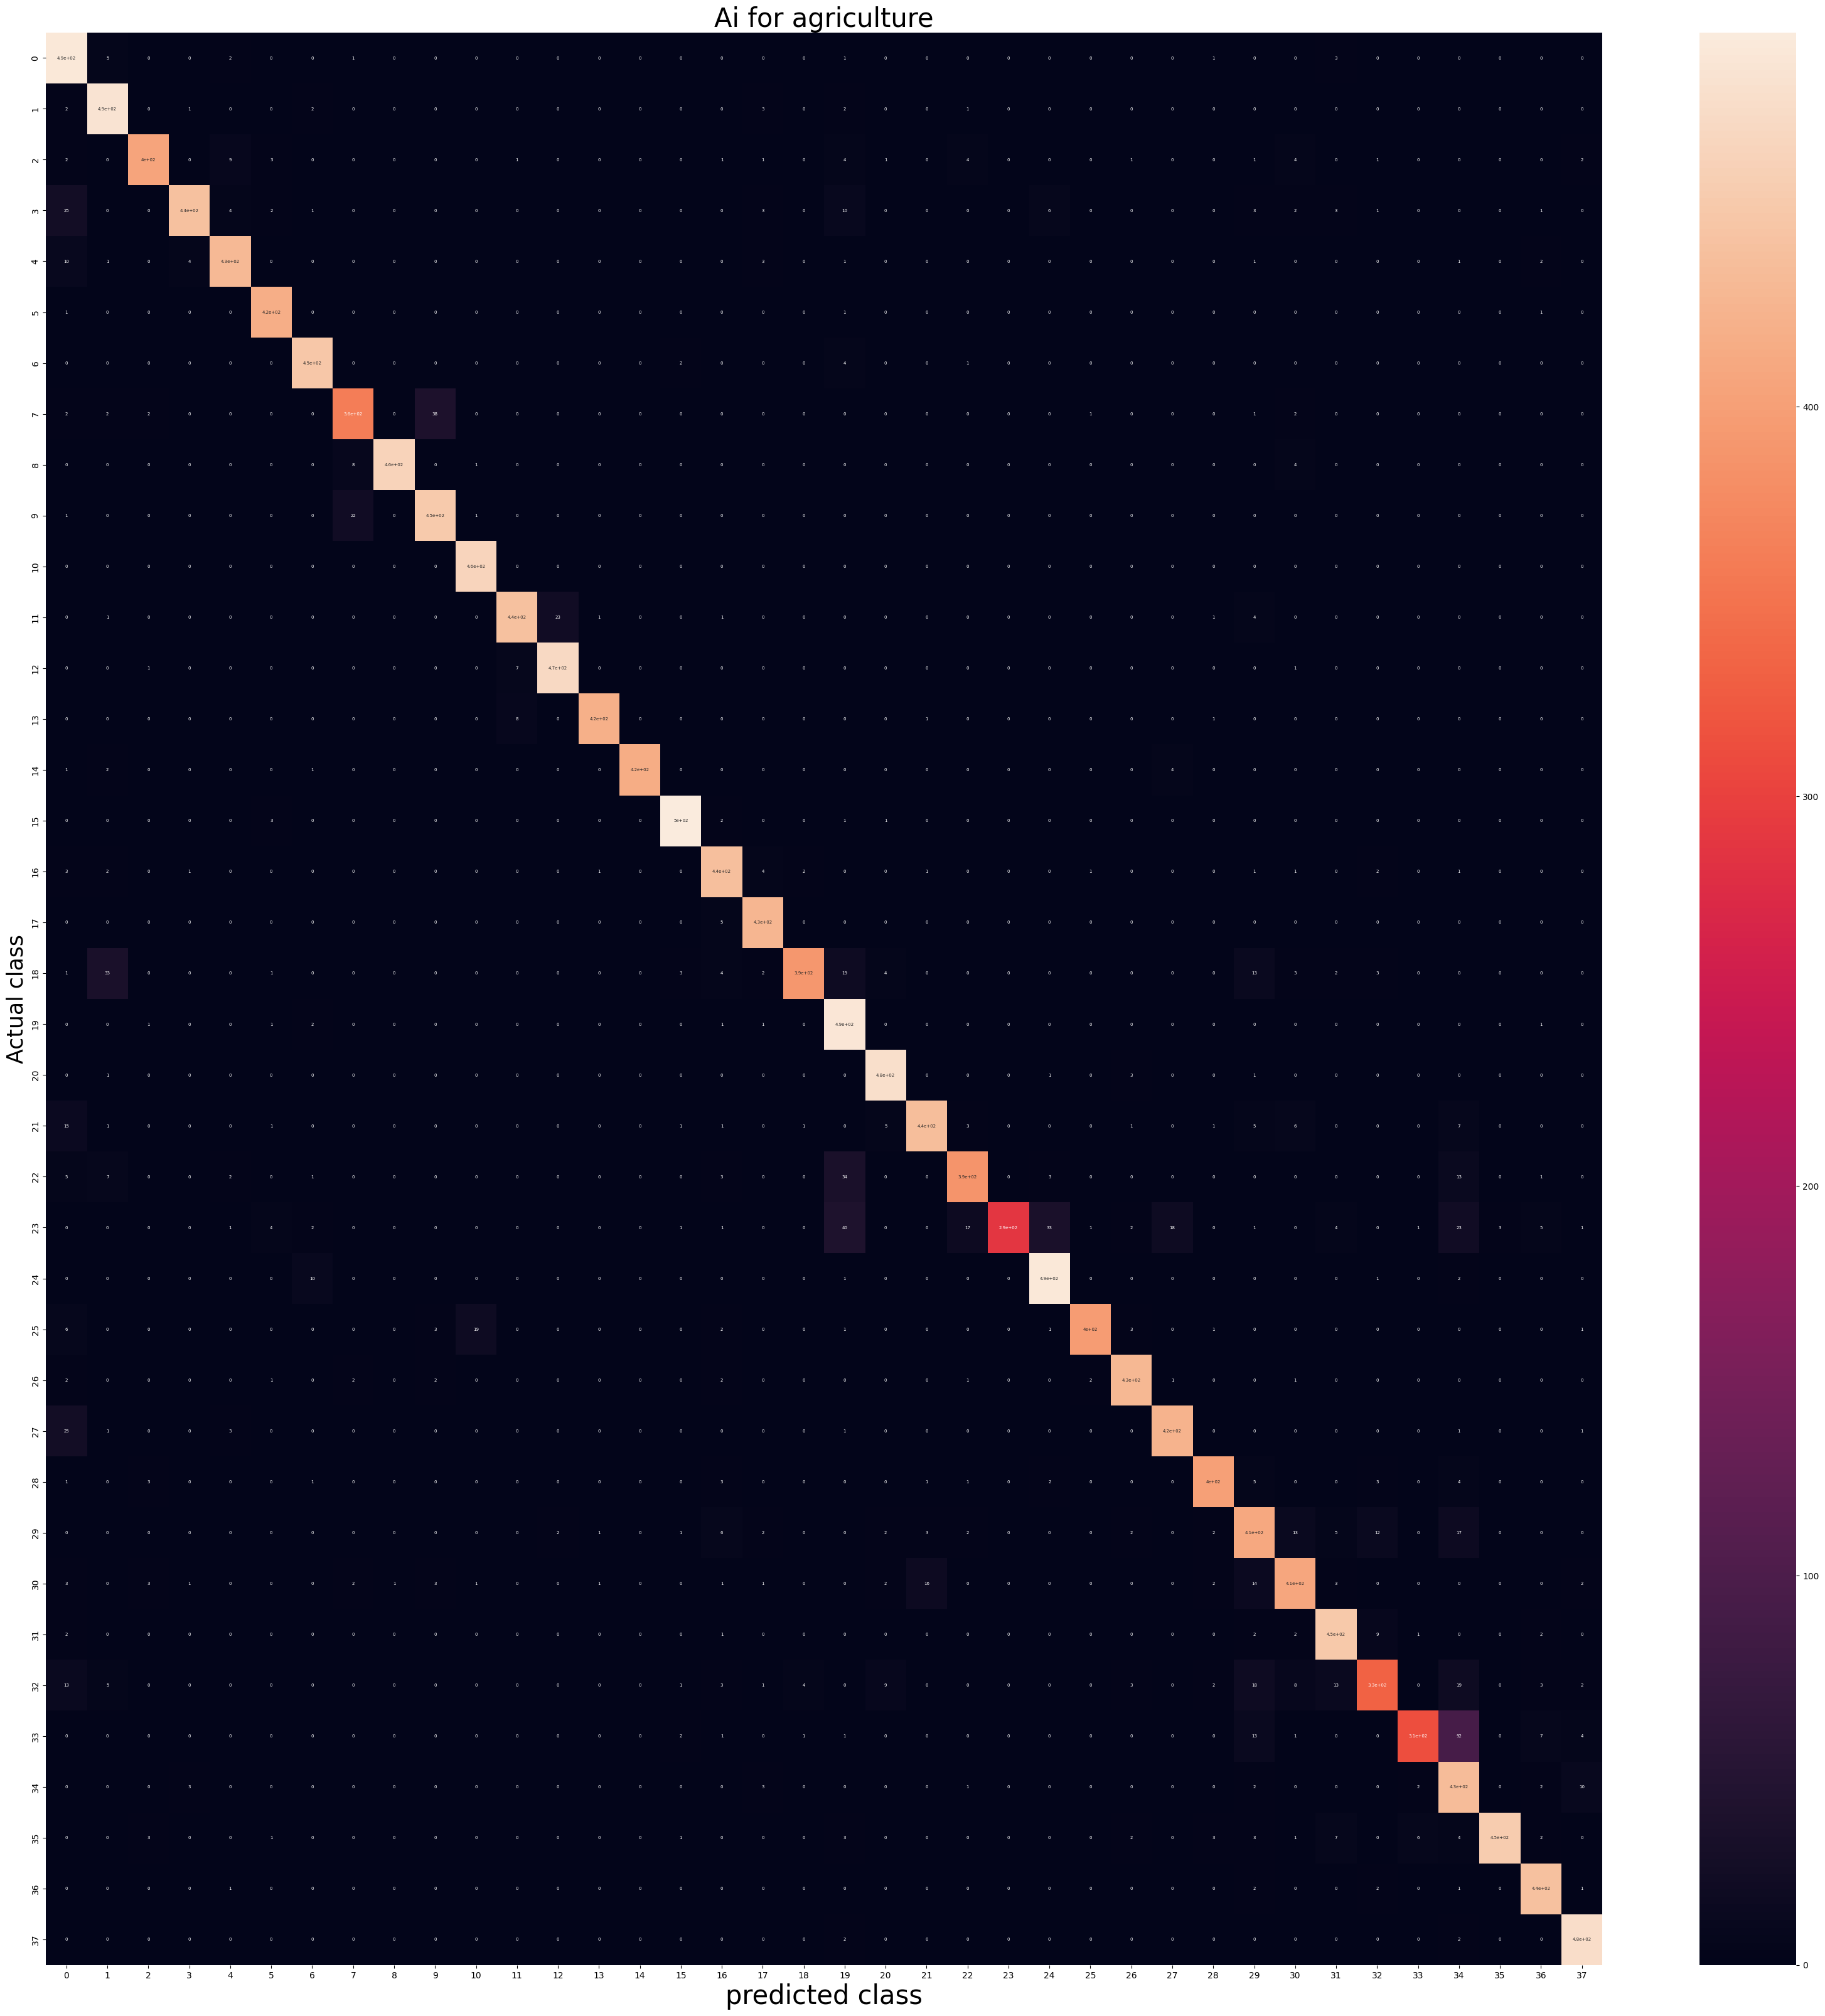

In [65]:
#we use the plt and sns
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':5})
plt.xlabel("predicted class",fontsize=30)
plt.ylabel("Actual class",fontsize=25)
plt.title("Ai for agriculture",fontsize=30)
plt.show()

### for soil prediction

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load your input CSV
df = pd.read_csv("Crop_recommendation.csv")  # Replace with your actual CSV filename

# Step 2: Create a synthetic 'Crop' label (example)
conditions = [
    (df['N'] < 70),
    (df['N'] >= 70) & (df['N'] < 85),
    (df['N'] >= 85)
]
choices = ['Rice', 'Wheat', 'Maize']
df['Crop'] = np.select(conditions, choices, default='Unknown')  # <-- FIXED

# Step 3: Encode categorical label
le_crop = LabelEncoder()
df['Crop'] = le_crop.fit_transform(df['Crop'])

# Step 4: Prepare features and labels
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['Crop']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train a model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Step 7: Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le_crop.classes_))
